---
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
title: Data of Global Indicators – Gapminder
jupyter: python3
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [5]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
import plotnine as p9

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [6]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [7]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

In [8]:
df_passengers = df_titanic[df_titanic["type"] == "passenger"]
pd.crosstab(df_passengers["class"], df_passengers["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [9]:
#the conditional distribution of their class given where they embarked
pd.crosstab(df_passengers["class"], df_passengers["embarked"], normalize=True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


* What proportion of 3rd class passengers embarked at Southampton?
The total proportion of 3rd class passengers is 53.8% (0+0.077449+0.085801+0.375095) of all passengers. 69.7% of 3rd class passengers embarked at Southampton, 37.5% of all passengers therefore were 3rd classers who embarked at Southampton. 

In [10]:
#the conditional distribution of where they embarked given their class
pd.crosstab(df_passengers["embarked"], df_passengers["class"], normalize=True)

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


* What proportion of Southampton passengers were in 3rd class?
On the Titanic 69.4% of passengers got on at Southampton. 54% of those Southampton passengers were in 3rd class. Overall 37.5% of passengers on the titanic were 3rd classers who got on in Southampton.  

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

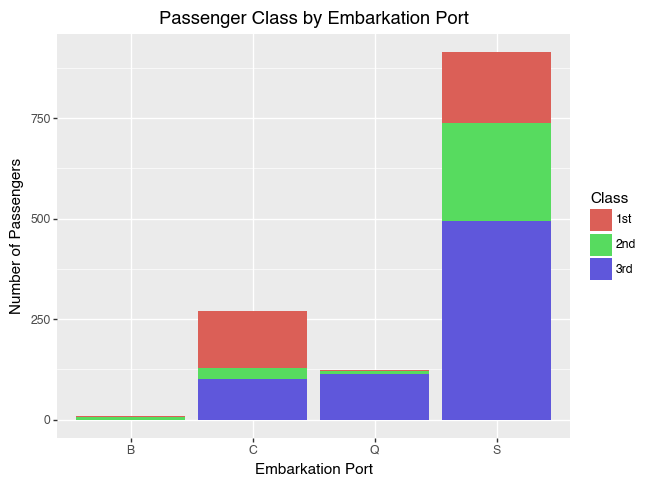

In [11]:
# Code here
(
    p9.ggplot(df_passengers, 
    p9.aes(x="embarked", fill="class")) 
    + p9.geom_bar() 
    + p9.labs(
        title="Passenger Class by Embarkation Port",
        x="Embarkation Port",
        y="Number of Passengers",
        fill="Class"
    ) 
)

This graph clearly shows that the lion's share of passengers were from Southampton and overall 3rd class. However this comes at the cost of making the port thart starts with B (which presumably is Belfast) neraly invisable. 